# Aggregating Daily MTA DATA

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [5]:
# Import Entries_per_day CSV sheet locally
df = pd.read_csv('../data/Entries_per_day.csv')
df.head()

,Unnamed: 0,C/A,Entries_per_day,Full Time,SCP,Station
0,5,A006,950.0,2018-05-06,00-00-00,5 AV/59 ST
1,6,A006,704.0,2018-05-07,00-00-00,5 AV/59 ST
2,7,A006,1602.0,2018-05-08,00-00-00,5 AV/59 ST
3,8,A006,1728.5,2018-05-09,00-00-00,5 AV/59 ST
4,9,A006,1721.0,2018-05-10,00-00-00,5 AV/59 ST


## Average 2-Month Ridership

In [6]:
# Set a 15000 person cutoff for the max to get rid of nonsensical outliers
df = df.loc[(df['Entries_per_day'] < 15000), :]
df = df.loc[(df['Entries_per_day'] > 0), :]

In [7]:
twomonth = (df
 .groupby(['Station'])['Entries_per_day']
 .sum()
 .reset_index()
 .sort_values(['Entries_per_day'], ascending=[False,])
)
twomonth.head(5)

,Station,Entries_per_day
60,34 ST-PENN STA,8049160.0
232,GRD CNTRL-42 ST,7004845.0
58,34 ST-HERALD SQ,5493116.0
45,23 ST,5337666.5
14,14 ST-UNION SQ,5320481.0


In [8]:
twomonth.rename(columns={'Entries_per_day':'2months'},inplace=True)

# Get Top 10 Stations
topten_twomonth = twomonth.head(10)
topten_twomonth

,Station,2months
60,34 ST-PENN STA,8049160.0
232,GRD CNTRL-42 ST,7004845.0
58,34 ST-HERALD SQ,5493116.0
45,23 ST,5337666.5
14,14 ST-UNION SQ,5320481.0
352,TIMES SQ-42 ST,5075815.0
225,FULTON ST,4676937.0
67,42 ST-PORT AUTH,4601017.5
109,86 ST,4019731.0
9,125 ST,3829920.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Station')

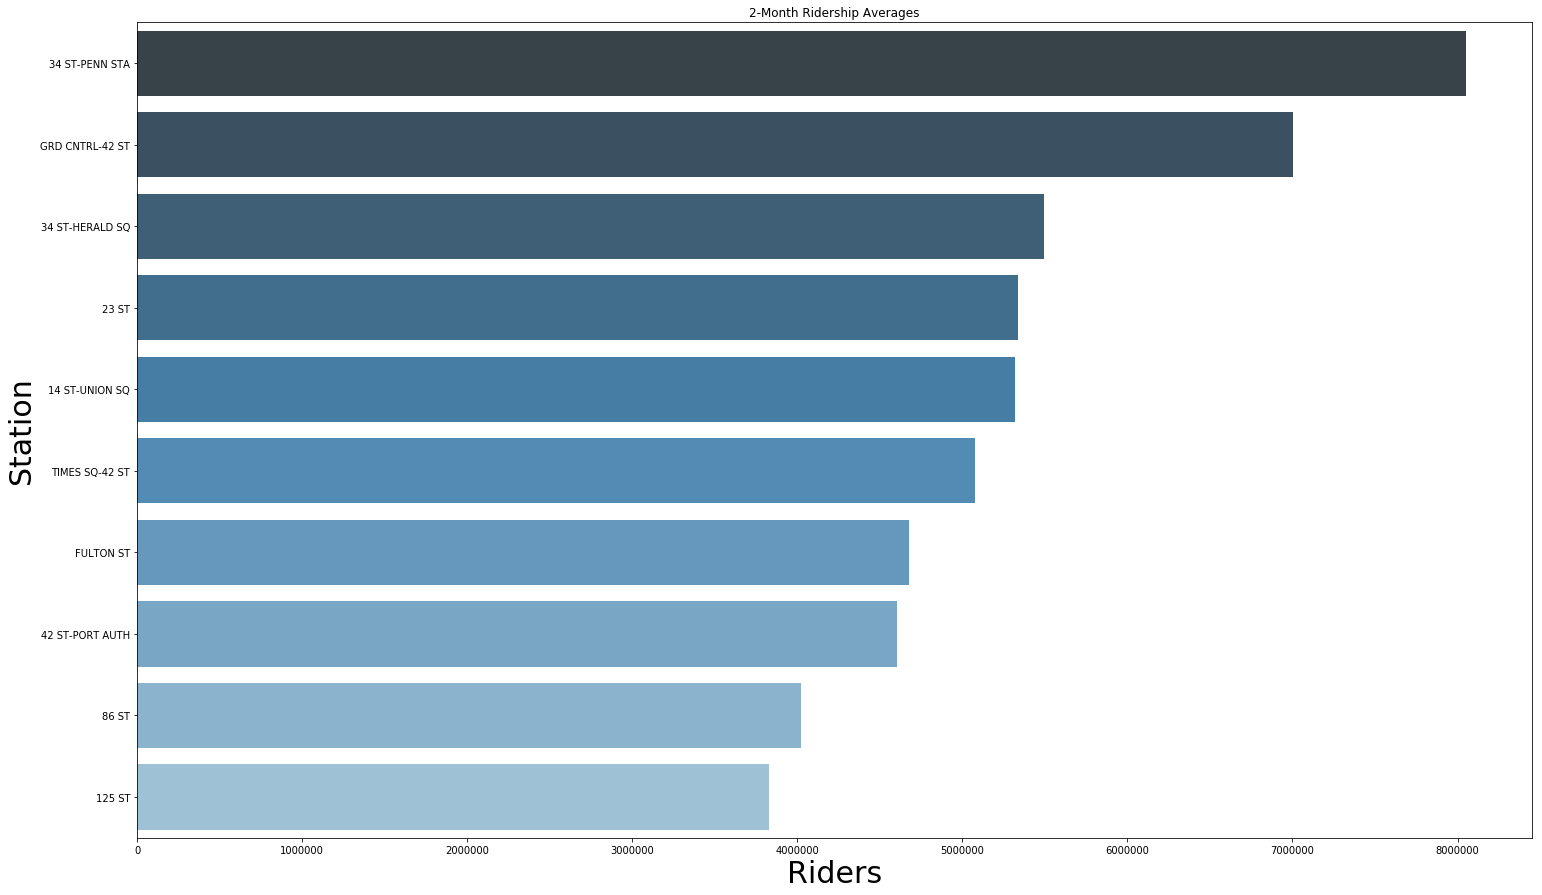

In [9]:
topten_twomonth['mean_entries'] = topten_twomonth['2months'] / 55
plt.figure(figsize=(25,15))
ax = sns.barplot(x='2months',y='Station',data=topten_twomonth, palette="Blues_d")
sns.set(rc={'axes.facecolor':'white' })
ax.set_title('2-Month Ridership Averages')
ax.set_xlabel("Riders",fontsize=30)
ax.set_ylabel("Station",fontsize=30)


## Weekday and Weekend Average 2 Month Ridership
I edited these charts to show just the top 10 like above on weekdays and weekends.
When in class we had accidentally shown all of them and got that really cool distribution. It might be nice to see something in that shape on the final presentation, since it's a cool viz. May bring those back.

In [10]:
# Make a numeric column corresponding to weekday
df['FullDate'] = pd.to_datetime(df['Full Time'])
df['weekday'] = df['FullDate'].dt.weekday
dic = {0:'weekday',1:'weekday',2:'weekday',3:'weekday',4:'weekday',5:'weekend',6:'weekend'}
df['weekday'].replace(dic,inplace=True)
df.head()

,Unnamed: 0,C/A,Entries_per_day,Full Time,SCP,Station,FullDate,weekday
0,5,A006,950.0,2018-05-06,00-00-00,5 AV/59 ST,2018-05-06,weekend
1,6,A006,704.0,2018-05-07,00-00-00,5 AV/59 ST,2018-05-07,weekday
2,7,A006,1602.0,2018-05-08,00-00-00,5 AV/59 ST,2018-05-08,weekday
3,8,A006,1728.5,2018-05-09,00-00-00,5 AV/59 ST,2018-05-09,weekday
4,9,A006,1721.0,2018-05-10,00-00-00,5 AV/59 ST,2018-05-10,weekday


In [11]:
#Rename column
df.rename(columns={'Entries_per_day':'2months'},inplace=True)


In [12]:
# Weekday specific Top 10 stations Aggregation
dfwkday = df.loc[df.weekday == 'weekday']
dfwkday = (dfwkday
 .groupby(['Station'])['2months']
 .sum()
 .reset_index()
 .sort_values(['2months'], ascending=[False,])
)

# Get Top 10 Stations
topten_twomonth_wkday = dfwkday.head(10)
topten_twomonth_wkday

,Station,2months
60,34 ST-PENN STA,6097090.0
232,GRD CNTRL-42 ST,5380984.5
58,34 ST-HERALD SQ,4084375.0
45,23 ST,4049257.5
14,14 ST-UNION SQ,3852950.5
352,TIMES SQ-42 ST,3728091.5
225,FULTON ST,3519748.5
67,42 ST-PORT AUTH,3361826.0
109,86 ST,2965488.5
9,125 ST,2775729.0


In [13]:
# Weekend specific Top 10 stations Aggregation

dfwknd = df.loc[df.weekday == 'weekend']
dfwknd = (dfwknd
 .groupby(['Station'])['2months']
 .sum()
 .reset_index()
 .sort_values(['2months'], ascending=[False,])
)
topten_twomonth_wknd = dfwknd.head(10)
topten_twomonth_wknd

,Station,2months
60,34 ST-PENN STA,1952070.0
232,GRD CNTRL-42 ST,1623860.5
14,14 ST-UNION SQ,1467530.5
58,34 ST-HERALD SQ,1408741.0
352,TIMES SQ-42 ST,1347723.5
45,23 ST,1288409.0
67,42 ST-PORT AUTH,1239191.5
225,FULTON ST,1157188.5
109,86 ST,1054242.5
9,125 ST,1054191.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Station')

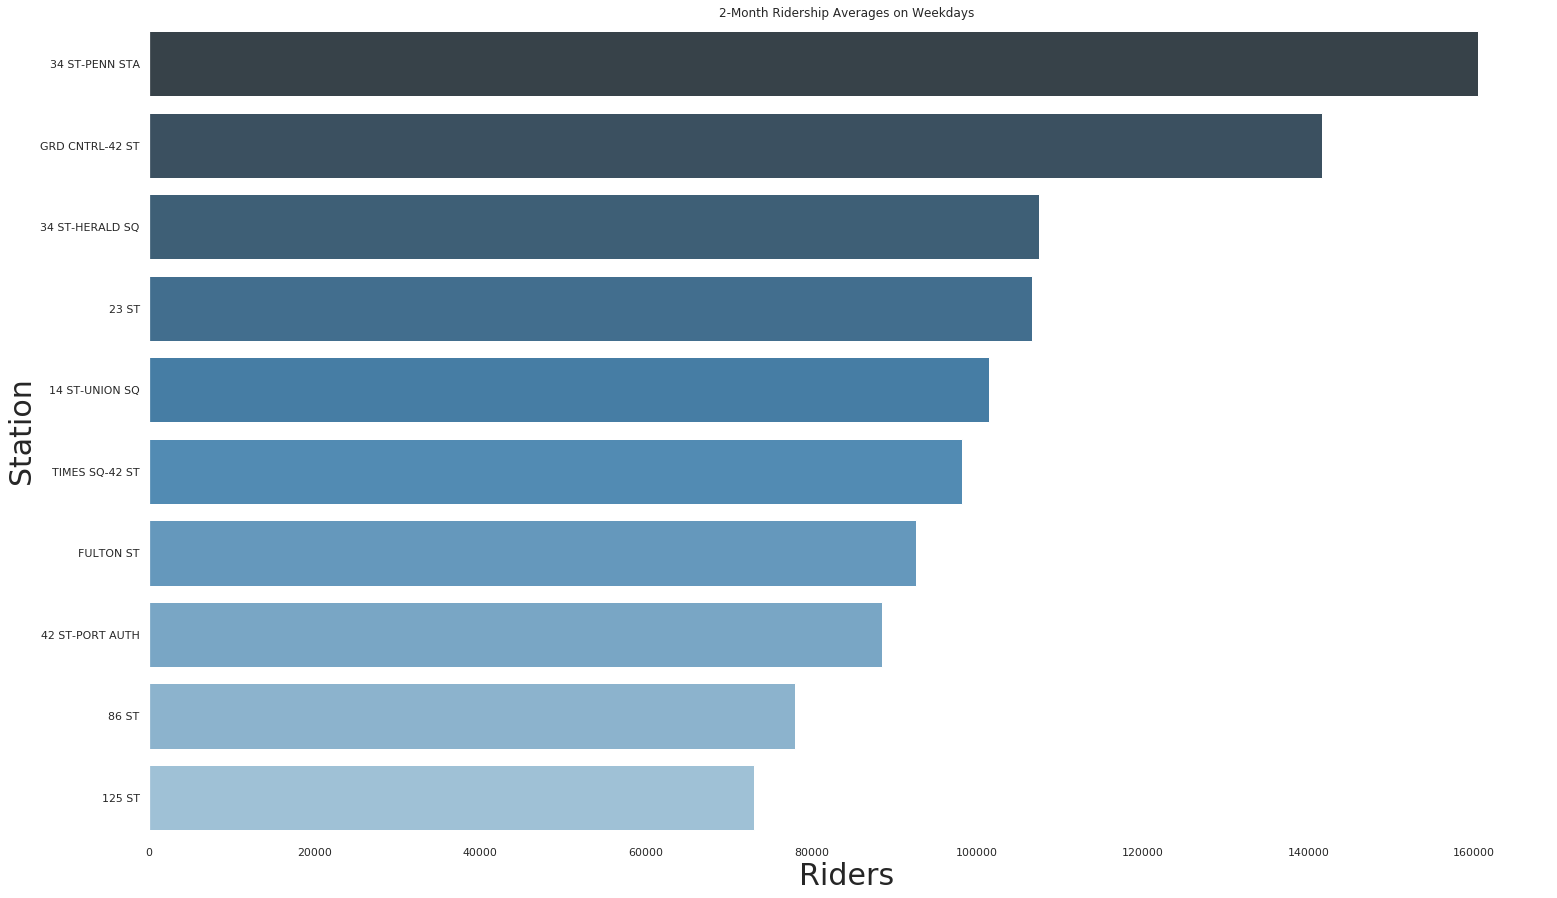

In [52]:
topten_twomonth_wkday['avg_entries'] = topten_twomonth_wkday['2months'] / 38
plt.figure(figsize=(25,15))
ax = sns.barplot(x='avg_entries',y='Station',data=topten_twomonth_wkday, palette="Blues_d")
sns.set(rc={'axes.facecolor':'white' })
ax.set_title('2-Month Ridership Averages on Weekdays')
ax.set_xlabel("Riders",fontsize=30)
ax.set_ylabel("Station",fontsize=30)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Station')

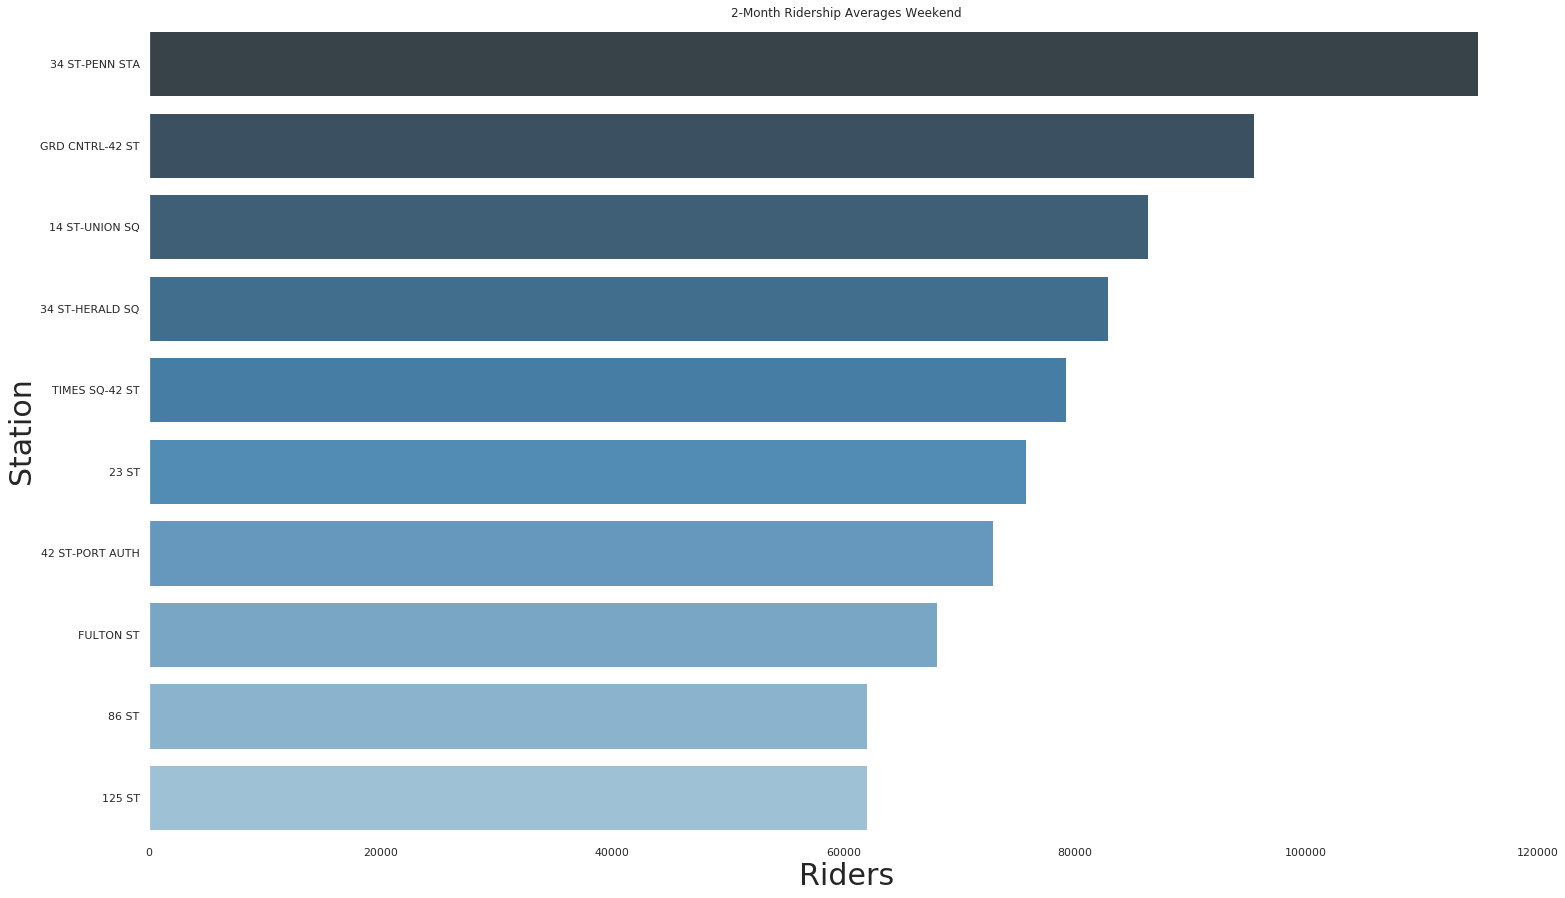

In [51]:
topten_twomonth_wknd['avg_entries'] = topten_twomonth_wknd['2months'] / 17
plt.figure(figsize=(25,15))
ax = sns.barplot(x='avg_entries',y='Station',data=topten_twomonth_wknd, palette="Blues_d")
sns.set(rc={'axes.facecolor':'white' })
#ax.set(xlabel='Riders', ylabel='Stations')
ax.set_title('2-Month Ridership Averages Weekend')
ax.set_xlabel("Riders",fontsize=30)
ax.set_ylabel("Station",fontsize=30)

### Attempt at a double bar chart by Hue for Weekday/Weekend
Placing the weekend/weekday bar charts side by side for each station more clearly shows the stark ridership difference. In fact it's so large we may want to recommend only during commuting hours and not weekend. I know we were discussing that anyway but this is some good backup.
Some data transformation first, as the df needs to be shaped in a certain way in order to do a categorical-comparison bar chart. In fact what was needed was a facet grid object type for Seaborn, more info here: https://seaborn.pydata.org/generated/seaborn.catplot.html. Note in particular the set titles and things like that are done differently on facet types.

In [53]:
topten_twomonth_wkday['day'] = 'weekday'
topten_twomonth_wknd['day'] = 'weekend'
topten_twomonth_wkday

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Station,2months,avg_entries,weekday,day
60,34 ST-PENN STA,6097090.0,160449.736842,weekday,weekday
232,GRD CNTRL-42 ST,5380984.5,141604.855263,weekday,weekday
58,34 ST-HERALD SQ,4084375.0,107483.552632,weekday,weekday
45,23 ST,4049257.5,106559.407895,weekday,weekday
14,14 ST-UNION SQ,3852950.5,101393.434211,weekday,weekday
352,TIMES SQ-42 ST,3728091.5,98107.671053,weekday,weekday
225,FULTON ST,3519748.5,92624.960526,weekday,weekday
67,42 ST-PORT AUTH,3361826.0,88469.105263,weekday,weekday
109,86 ST,2965488.5,78039.171053,weekday,weekday
9,125 ST,2775729.0,73045.500000,weekday,weekday


In [54]:
stackedbardf = pd.concat([topten_twomonth_wkday,topten_twomonth_wknd])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<Figure size 1800x1080 with 0 Axes>

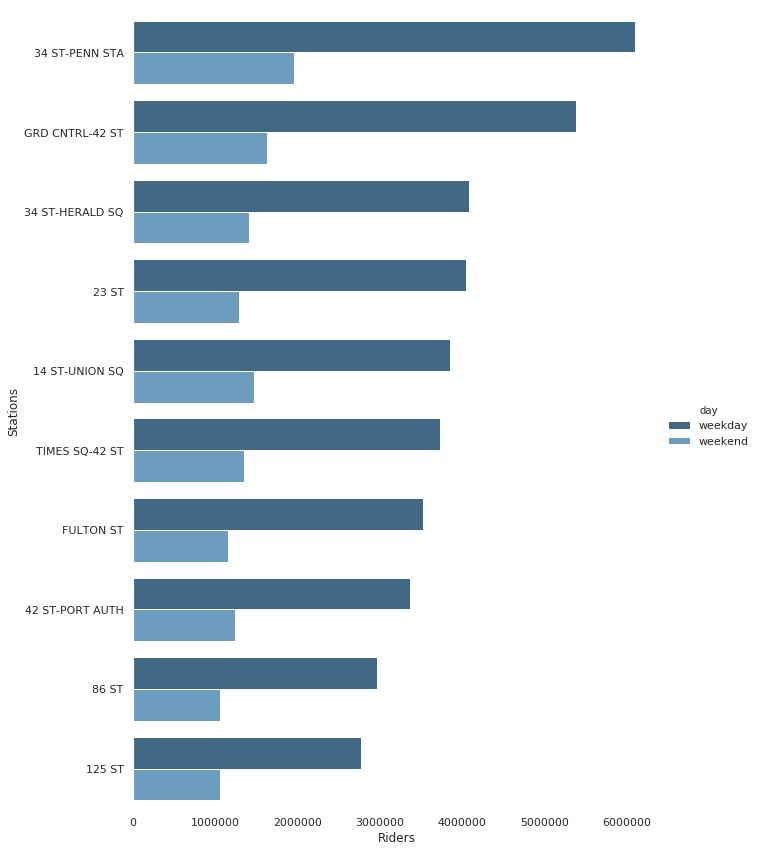

In [70]:
plt.figure(figsize=(25,15))

#ax = sns.barplot(x='avg_entries',y='Station',data=topten_twomonth_wknd, palette="Blues_d")
sns.set(rc={'axes.facecolor':'white' })
#ax.set_title('2-Month Ridership Averages Weekday/Weekend')
#ax.set_xlabel("Riders",fontsize=30)
#ax.set_ylabel("Station",fontsize=30)
ax = sns.catplot(x='2months', y='Station', hue='day', data=stackedbardf, kind='bar', palette="Blues_d", height=12, aspect=.8)

ax.set_axis_labels("Riders", "Stations") #doesn't seem to be a set title in catplot
                                                                                                                              